## Import Library

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
df = pd.read_csv('kebotakan.csv')

In [3]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [6]:
print('Informasi data:')
df.info()

print('\n')
print('Informasi missing value:')
df.isnull().sum()

Informasi data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7917 entries, 0 to 7916
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   umur           7832 non-null   float64
 1   jenis_kelamin  7840 non-null   object 
 2   pekerjaan      7760 non-null   object 
 3   provinsi       7831 non-null   object 
 4   gaji           7843 non-null   float64
 5   is_menikah     7845 non-null   float64
 6   is_keturunan   7828 non-null   float64
 7   berat          7861 non-null   float64
 8   tinggi         7843 non-null   float64
 9   sampo          7858 non-null   object 
 10  is_merokok     7847 non-null   float64
 11  pendidikan     7847 non-null   object 
 12  stress         7853 non-null   float64
 13  botak_prob     7838 non-null   float64
dtypes: float64(9), object(5)
memory usage: 866.1+ KB


Informasi missing value:


umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64

## Exploratory Data Analysis

In [11]:
print('Statistika deskriptif untuk data numerik:')
df.describe()

Statistika deskriptif untuk data numerik:


,umur,gaji,is_menikah,is_keturunan,berat,tinggi,is_merokok,stress,botak_prob
count,7832.000000,7.843000e+03,7845.000000,7828.000000,7861.000000,7843.000000,7847.000000,7853.000000,7838.000000
mean,39.492722,8.853770e+06,0.979095,0.204650,55.957306,167.252704,0.497133,5.456259,0.573851
std,9.882786,4.499844e+06,0.143076,0.403471,9.594065,10.933646,0.500024,2.860623,0.173386
min,2.000000,1.500000e+06,0.000000,0.000000,40.000000,125.491784,0.000000,1.000000,0.064633
25%,33.000000,5.735468e+06,1.000000,0.000000,49.312715,159.758874,0.000000,3.000000,0.452360
50%,39.000000,7.850662e+06,1.000000,0.000000,53.839669,167.155287,0.000000,5.000000,0.567954
75%,46.000000,1.083589e+07,1.000000,0.000000,60.259654,174.439620,1.000000,8.000000,0.686782
max,77.000000,5.000000e+07,1.000000,1.000000,150.000000,226.454577,1.000000,10.000000,1.000000


In [12]:
print('Statistika deskriptif untuk data kategorik:')
df.describe(include='O')

Statistika deskriptif untuk data kategorik:


,jenis_kelamin,pekerjaan,provinsi,sampo,pendidikan
count,7840,7760,7831,7858,7847
unique,2,4,34,5,6
top,Laki-laki,Pegawai swasta,Kupang,Deadbuoy,S1
freq,5367,3160,261,1618,4309


In [70]:
cat_var = df[['jenis_kelamin','pekerjaan','sampo','pendidikan']]
num_var = df[['umur','gaji','berat','tinggi','stress','botak_prob']]

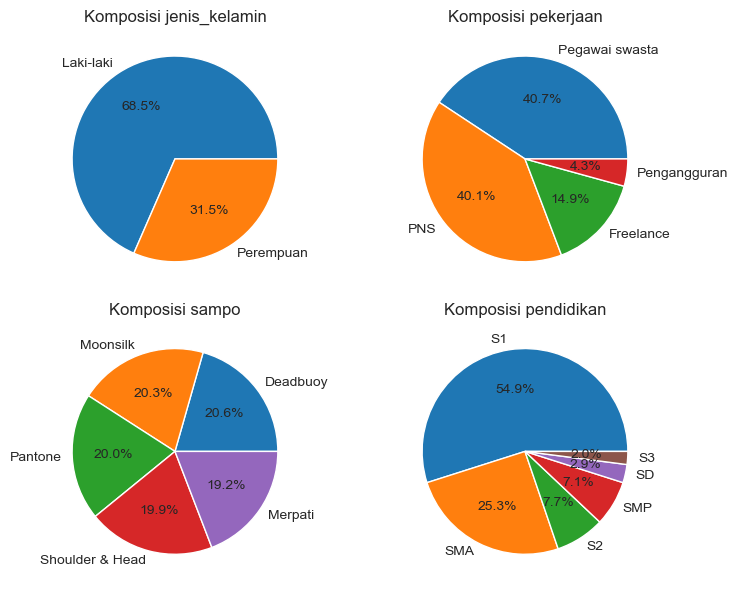

In [177]:
fig, axes = plt.subplots(2, 2, figsize=(8,6))    
axes = axes.flatten()

for ax, col in zip(axes, cat_var):
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax)
    ax.set_title(f'Komposisi {col}')
    ax.set_ylabel('')

fig.tight_layout()
plt.show()

In [74]:
cat_var2 = df[['is_menikah','is_keturunan','is_merokok']]

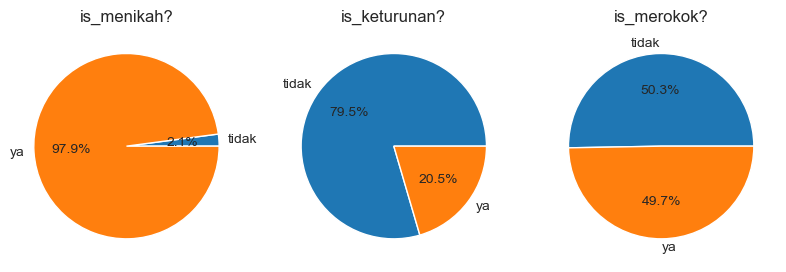

In [179]:
fig, axes = plt.subplots(1, 3, figsize=(8,5))    
axes = axes.flatten()

for ax, col in zip(axes, cat_var2):
    df[col].value_counts().sort_index().plot(kind='pie',labels=['tidak','ya'], autopct='%1.1f%%', ax=ax)
    ax.set_ylabel('')
    ax.set_title(f'{col}?')

fig.tight_layout()
plt.show()

In [187]:
from matplotlib.lines import Line2D

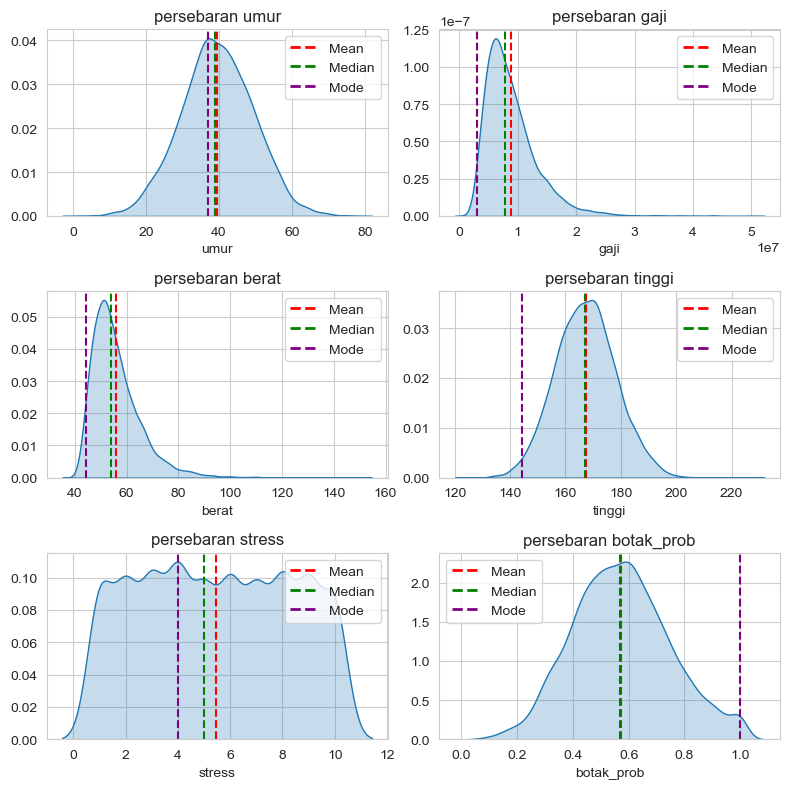

In [190]:
fig, axes = plt.subplots(3, 2, figsize=(8,8))    
axes = axes.flatten()

for ax, col in zip(axes, num_var):
    sns.kdeplot(data = df, x=col, ax = ax, fill=True)
    ax.axvline(x=df[col].mean(), color='red', ls='--', lw=1.5)
    ax.axvline(x=df[col].median(), color='green', ls='--', lw=1.5)
    ax.axvline(x=df[col].mode()[0], color='purple', ls='--', lw=1.5)
    ax.set_ylabel('')
    ax.set_title(f'persebaran {col}')
    #membuat legend
    colors = ['red', 'green', 'purple']
    lines = [Line2D([0], [0], color=c, linewidth=2, linestyle='--') for c in colors]
    labels = ['Mean', 'Median', 'Mode']
    ax.legend(lines, labels)
    
fig.tight_layout()
plt.show()

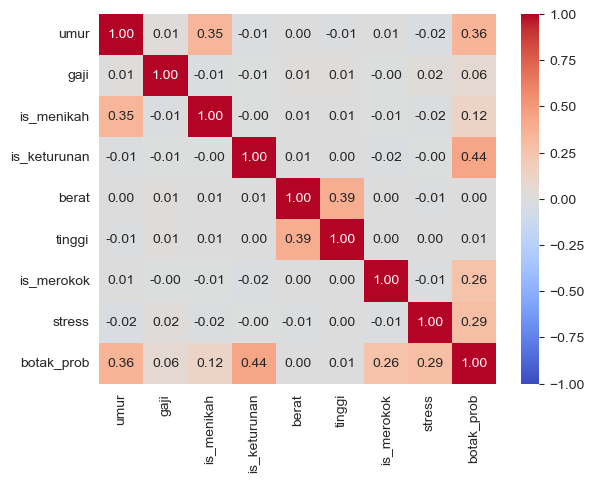

In [105]:
sns.heatmap(df.corr(numeric_only=True),cmap='coolwarm',vmin=-1, annot=True, fmt=',.2f');

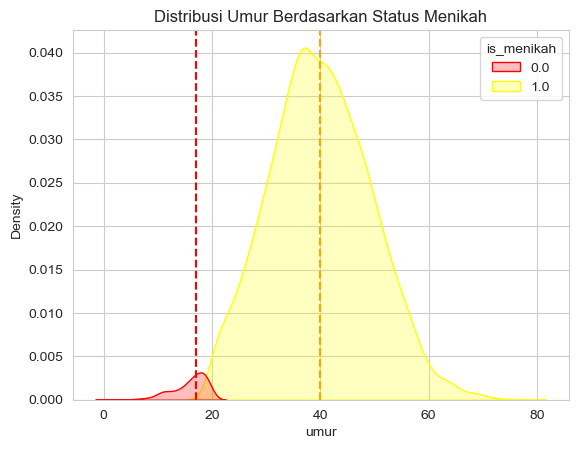

In [198]:
sns.kdeplot(data=df, x='umur', hue='is_menikah', fill=True, palette='autumn')
plt.axvline(x=df[df['is_menikah']==1.0]['umur'].median(), color='orange', ls='--', lw=1.5)
plt.axvline(x=df[df['is_menikah']==0.0]['umur'].median(), color='red', ls='--', lw=1.5)
plt.title('Distribusi Umur Berdasarkan Status Menikah');

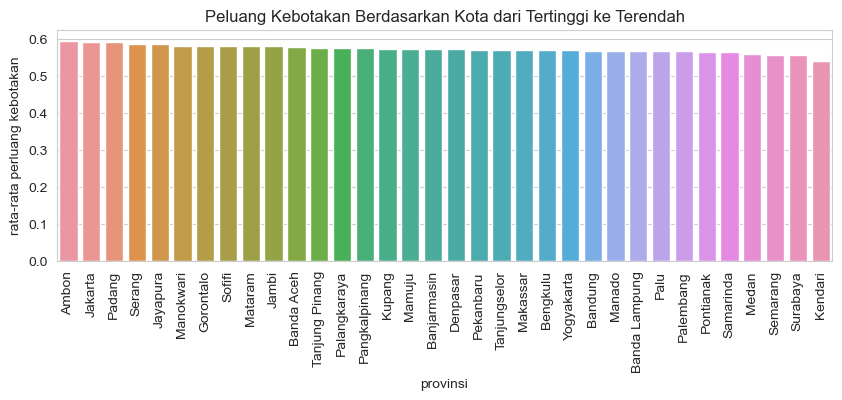

In [231]:
plt.figure(figsize=(10,3))
result = df.groupby('provinsi')['botak_prob'].mean()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.ylabel('rata-rata perluang kebotakan')
plt.title('Peluang Kebotakan Berdasarkan Kota dari Tertinggi ke Terendah');

## EDA dimana Probability Kebotakan Lebih Dari 70%

In [138]:
df_botak = df[df['botak_prob']>=0.7]

In [146]:
print(f'Jumlah baris pada data asli : {df.shape[0]}')
print(f'Jumlah baris dimana probability kebotakan lebih dari 70% : {df_botak.shape[0]}')

Jumlah baris pada data asli : 7917
Jumlah baris dimana probability kebotakan lebih dari 70% : 1777


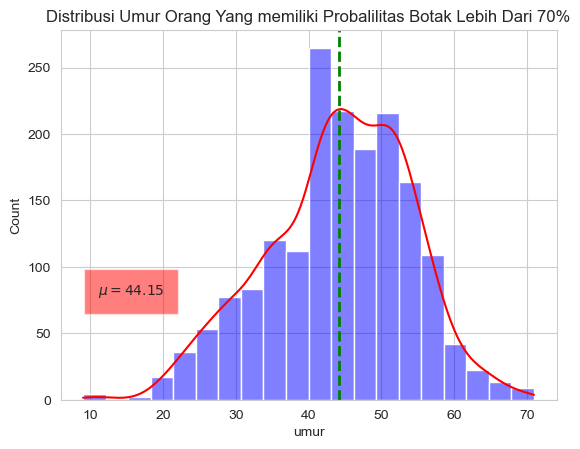

In [150]:
# UMUR
fig3, axs3 = plt.subplots()
sns.histplot(df_botak, x='umur', bins=20, color='blue', alpha=0.5, kde=True, ax=axs3)
axs3.lines[0].set_color('red')
axs3.axvline(x=df_botak.umur.mean(), color='green', ls='--', lw=2)
axs3.text(11, 79, r'$\mu={}$'.format('%.2f' % df_botak['umur'].mean()), style='italic', bbox={
        'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
axs3.set_title('Distribusi Umur Orang Yang memiliki Probalilitas Botak Lebih Dari 70%')
plt.show()

**Orang yang memiliki peluang kebotakan tinggi berada di rentang usia 40-50 tahun**

In [151]:
cat_var2_botak = df_botak[['is_menikah','is_merokok','is_keturunan']]

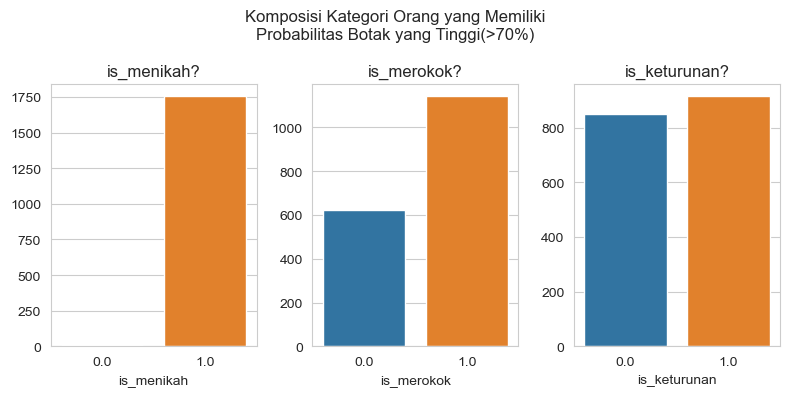

In [176]:
fig, axes = plt.subplots(1, 3, figsize=(8,4))    
axes = axes.flatten()

for ax, col in zip(axes, cat_var2_botak.columns):
    sns.countplot(data=df_botak, x=col, ax=ax)
#     df_botak[col].value_counts().sort_index().plot(kind='pie',labels=['tidak','ya'], autopct='%1.1f%%', ax=ax)
    ax.set_ylabel('')
    ax.set_title(f'{col}?')

fig.suptitle('Komposisi Kategori Orang yang Memiliki\nProbabilitas Botak yang Tinggi(>70%)')
fig.tight_layout()
plt.show()

**Orang yang menikah, perokok, dan memiliki keturunan memiliki peluang kebotakan yang lebih tinggi**

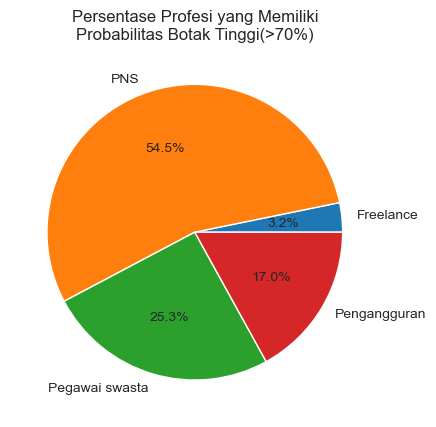

In [160]:
df_botak.groupby('pekerjaan').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Profesi yang Memiliki\nProbabilitas Botak Tinggi(>70%)');

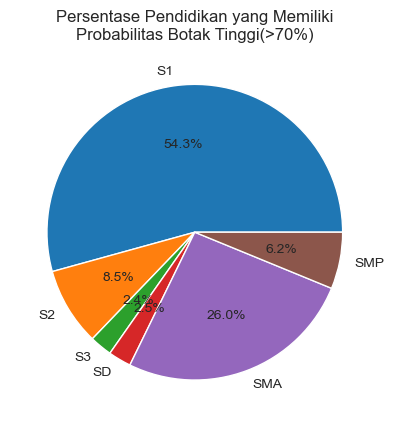

In [168]:
df_botak.groupby('pendidikan').size().plot(kind='pie', autopct='%1.1f%%')
plt.title('Persentase Pendidikan yang Memiliki\nProbabilitas Botak Tinggi(>70%)');

## Data Preprocessing

### Menangani Missing Value

In [200]:
print('Jumlah missing value pada setiap kolom:')
print(df.isnull().sum())

Jumlah missing value pada setiap kolom:
umur              85
jenis_kelamin     77
pekerjaan        157
provinsi          86
gaji              74
is_menikah        72
is_keturunan      89
berat             56
tinggi            74
sampo             59
is_merokok        70
pendidikan        70
stress            64
botak_prob        79
dtype: int64


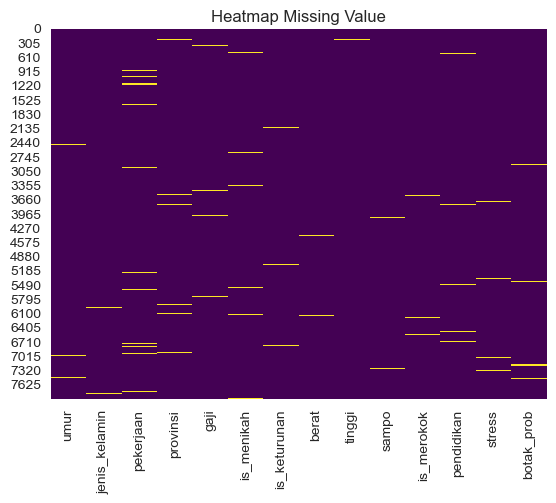

In [204]:
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('Heatmap Missing Value');

**Terlihat bahwa semua kolom memiliki missing value**

In [232]:
# Treatment missing value
jenis_kelamin_mode = df['jenis_kelamin'].mode()[0]
pekerjaan_mode = df['pekerjaan'].mode()[0]
is_keturunan_mode = df['is_keturunan'].mode()[0]
sampo_mode = df['sampo'].mode()[0]
berat_mean = df['berat'].mean()
gaji_mean = df['gaji'].mean()
tinggi_mean = df['tinggi'].mean()
is_menikah_mode = df['is_menikah'].mode()[0]
is_merokok_mode = df['is_merokok'].mode()[0]
pendidikan_mode = df['pendidikan'].mode()[0]
stress_mean = df['stress'].mean()
botak_prob_mean = df['botak_prob'].mean()

# Mengisi missing value dengan nilai modus dan rata-rata
df['umur'].fillna(df['umur'].median(), inplace=True)  # Menggunakan median untuk umur
df['jenis_kelamin'].fillna(jenis_kelamin_mode, inplace=True)
df['pekerjaan'].fillna(pekerjaan_mode, inplace=True)
df['provinsi'].fillna(df['provinsi'].mode()[0], inplace=True)  # Menggunakan modus untuk provinsi
df['gaji'].fillna(gaji_mean, inplace=True)
df['is_menikah'].fillna(is_menikah_mode, inplace=True)
df['is_keturunan'].fillna(is_keturunan_mode, inplace=True)
df['berat'].fillna(berat_mean, inplace=True)
df['tinggi'].fillna(tinggi_mean, inplace=True)
df['sampo'].fillna(sampo_mode, inplace=True)
df['is_merokok'].fillna(is_merokok_mode, inplace=True)
df['pendidikan'].fillna(pendidikan_mode, inplace=True)
df['stress'].fillna(stress_mean, inplace=True)
df['botak_prob'].fillna(botak_prob_mean, inplace=True)

In [234]:
print('Cek Ulang Missing Value:')
print(df.isnull().sum())

Cek Ulang Missing Value:
umur             0
jenis_kelamin    0
pekerjaan        0
provinsi         0
gaji             0
is_menikah       0
is_keturunan     0
berat            0
tinggi           0
sampo            0
is_merokok       0
pendidikan       0
stress           0
botak_prob       0
dtype: int64


**Setelah dilakukan treatmant, terlihat semua kolom tidak memiliki missing value**

### Treatment Outlier

In [237]:
num_var = df[['gaji', 'berat', 'tinggi']]

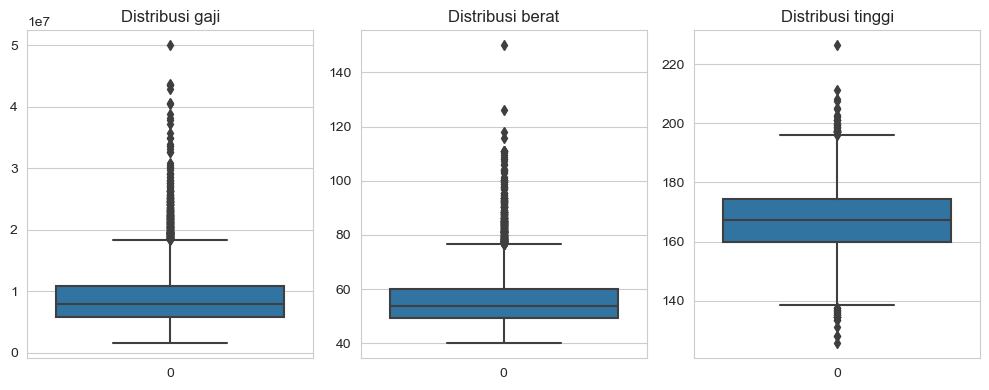

Jumlah Baris dengan outlier : 7917


In [244]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))    
axes = axes.flatten()

for ax, col in zip(axes, num_var.columns):
    sns.boxplot(df[col], ax=ax)
    ax.set_ylabel('')
    ax.set_title(f'Distribusi {col}')

fig.tight_layout()
plt.show()
print(f'Jumlah Baris dengan outlier : {df.shape[0]}')

In [248]:
# Buang Outlier
# Q1, Q3, dan IQR
for col in num_var.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR)))]

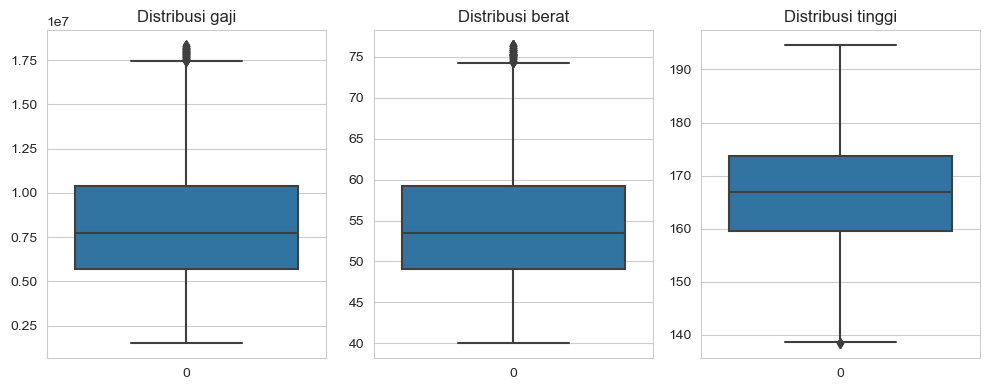

Jumlah Baris tanpa outlier : 7301


In [249]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))    
axes = axes.flatten()

for ax, col in zip(axes, num_var.columns):
    sns.boxplot(df[col], ax=ax)
    ax.set_ylabel('')
    ax.set_title(f'Distribusi {col}')

fig.tight_layout()
plt.show()
print(f'Jumlah Baris tanpa outlier : {df.shape[0]}')

### Feature Encoding

In [250]:
df.head()

,umur,jenis_kelamin,pekerjaan,provinsi,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,Perempuan,PNS,Bengkulu,7.957453e+06,1.0,0.0,54.315053,170.428542,Pantone,1.0,S1,5.0,0.605974
1,53.0,Perempuan,PNS,Bandung,7.633003e+06,1.0,0.0,72.873404,165.530097,Pantone,0.0,S1,7.0,0.532860
2,37.0,Perempuan,Pegawai swasta,Bandung,6.637625e+06,1.0,0.0,46.321533,154.599388,Moonsilk,0.0,S1,4.0,0.418442
3,36.0,Perempuan,Pengangguran,Palu,3.624871e+06,1.0,0.0,51.539781,167.340481,Deadbuoy,1.0,SD,9.0,0.804050
4,38.0,Laki-laki,Freelance,Palangkaraya,6.031808e+06,1.0,0.0,60.726909,165.514773,Merpati,1.0,S2,1.0,0.368371


In [256]:
# menghapus kolom provinsi
df.drop('provinsi', axis=1, inplace=True)

In [257]:
# Label Encoding
# Kolom-kolom yang akan di-Label Encoding
kolom_kategorik = ['jenis_kelamin', 'pekerjaan', 'sampo', 'pendidikan']

# Membuat peta mapping untuk setiap kolom kategorikal
gender_map = {'Laki-laki': 1, 'Perempuan': 0}  # Mapping jenis kelamin ke angka 1 dan 0
pekerjaan_map = {'Freelance': 0, 'PNS': 1, 'Pegawai swasta': 2, 'Pengangguran': 3}  # Mapping pekerjaan ke angka 0, 1, 2, 3
sampo_map = {'Deadbuoy': 0, 'Merpati': 1, 'Moonsilk': 2, 'Pantone': 3, 'Shoulder & Head': 4}  # Mapping sampo ke angka 0, 1, 2, 3, 4
pendidikan_map = {'SD': 0, 'SMP': 1, 'SMA': 2, 'S1': 3, 'S2': 4, 'S3': 5}  # Mapping pendidikan ke angka 0, 1, 2, 3, 4, 5

# Menyusun peta-peta mapping ke dalam satu variabel list
my_map = [gender_map, pekerjaan_map, sampo_map, pendidikan_map]

# Melakukan Label Encoding untuk setiap kolom kategorikal
for kolom, my_map in zip(kolom_kategorik, my_map):
    df[kolom] = df[kolom].map(my_map)

In [258]:
df.head()

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress,botak_prob
0,27.0,0,1,7.957453e+06,1.0,0.0,54.315053,170.428542,3,1.0,3,5.0,0.605974
1,53.0,0,1,7.633003e+06,1.0,0.0,72.873404,165.530097,3,0.0,3,7.0,0.532860
2,37.0,0,2,6.637625e+06,1.0,0.0,46.321533,154.599388,2,0.0,3,4.0,0.418442
3,36.0,0,3,3.624871e+06,1.0,0.0,51.539781,167.340481,0,1.0,0,9.0,0.804050
4,38.0,1,0,6.031808e+06,1.0,0.0,60.726909,165.514773,1,1.0,4,1.0,0.368371


## Membuat Model dan Evaluasi

In [268]:
#Bagi data ke features dan label
#kolom gaji dan provinsi tidak dibutuhkan
X = df.drop('botak_prob', axis=1) #Kolom Features
y = df['botak_prob'] #Kolom class/label

# Split data ke training(75%) dan testing(25%).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [270]:
#Coba model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

#Import library untuk evaluasi
from sklearn.metrics import mean_squared_error

Hasil Evaluasi Regresi Linear
MSE: 0.012233677136451751
RSME: 0.11060595434447347
----------------------------------------
Hasil Evaluasi Decision Tree
MSE: 0.010003665161371073
RSME: 0.10001832412798703
----------------------------------------
Hasil Evaluasi Random Forest
MSE: 0.005511304332328547
RSME: 0.07423815954297727
----------------------------------------
Hasil Evaluasi Support Vector Regression
MSE: 0.03067789993006538
RSME: 0.17515107744477446
----------------------------------------


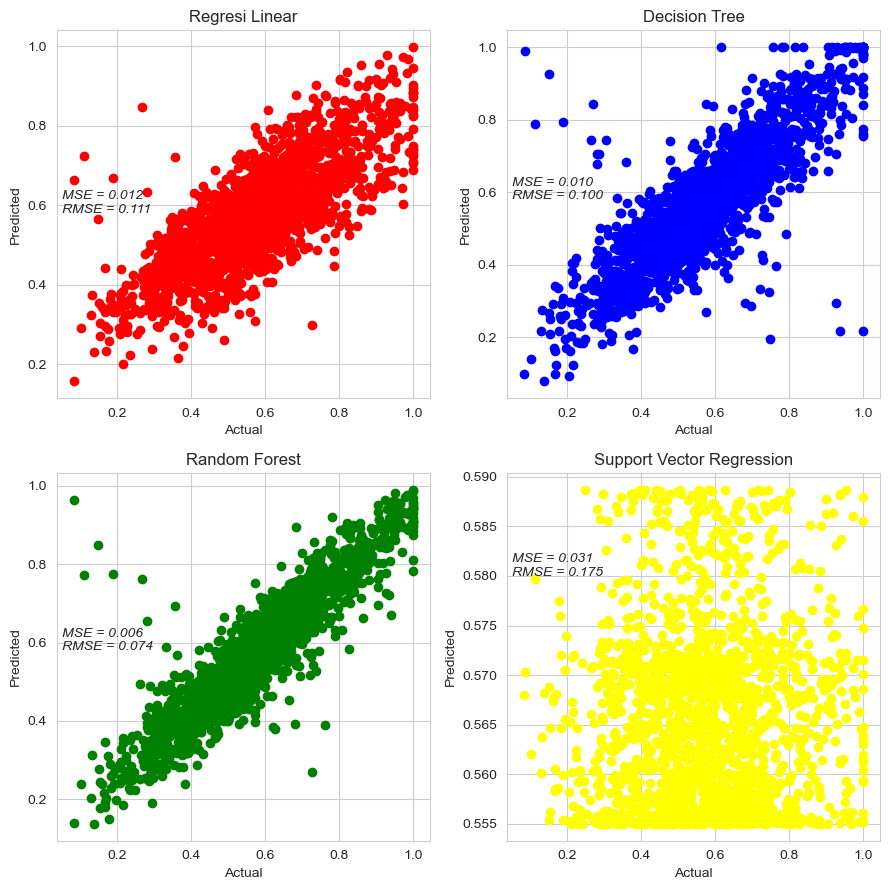

In [275]:
#Modeling
my_model = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR()]
model_name = ['Regresi Linear', 'Decision Tree', 'Random Forest','Support Vector Regression']

#Untuk Visualisasi Scatter Plot
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(9,9))
my_axs = [ax1,ax2,ax3,ax4]
my_color = ['red','blue','green','yellow']

for modeling, name, myaxs, mycolor in zip(my_model, model_name, my_axs, my_color):
    #Proses Training
    model = modeling
    model = model.fit(X_train, y_train)

    #Proses prediksi, Hasil prediksi disimpan kedalam variabel y_pred
    y_pred = model.predict(X_test)

    #Evaluasi dengan MSE dan RMSE, Semakin kecil semakin bagus
    # MSE
    print(f"Hasil Evaluasi {name}")
    mse = mean_squared_error(y_test, y_pred)
    print('MSE:', mse)

    # RMSE
    rmse = np.sqrt(mse)
    print('RSME:', rmse)
    print(20*'--')

    #Scatter plot perbandingan nilai prediksi dengan nilai aktual
    myaxs.scatter(y_test, y_pred, color=mycolor)
    myaxs.set_title(name)
    myaxs.set_xlabel('Actual')
    myaxs.set_ylabel('Predicted')
    myaxs.text(0.05, 0.580, f"MSE = {'%.3f' % mse}\nRMSE = {'%.3f' % rmse}", style='italic')


plt.tight_layout()
plt.show()

**Berdasarkan plot dan nilai MSE & RMSE di atas, model random forest memiliki performa terbaik dengan nilai MSE & RMSE terendah. Sehingga model random forest dipilih dan disimpan agar model dapat digunakan untuk prediksi tanpa training ulang.**

In [276]:
import pickle
forest = RandomForestRegressor()
forest = forest.fit(X_train, y_train)
pickle.dump(forest, open('forest.pkl', 'wb'))

## Memakai Model

In [277]:
#Membuat fungsi preprocessing untuk label encoding data yang baru masuk
def Preprocess(data):

    # Label Encoding
    kolom_kategorik = ['jenis_kelamin','pekerjaan','sampo','pendidikan']

    gender_map = ({'Laki-laki' : 1,
                   'Perempuan' : 0})
    pekerjaan_map = ({'Freelance' : 0,
                      'PNS' : 1,
                      'Pegawai swasta' : 2,
                      'Pengangguran' : 3})
    sampo_map = ({'Deadbuoy' : 0,
                  'Merpati' : 1,
                  'Moonsilk' :2,
                  'Pantone' : 3,
                  'Shoulder & Head' : 4})
    pendidikan_map = ({'SD' : 0,
                       'SMP' : 1,
                       'SMA' : 2,
                       'S1' : 3,
                       'S2': 4,
                       'S3': 5})

    my_map = [gender_map,pekerjaan_map,sampo_map,pendidikan_map]

    for kolom,my_map in zip(kolom_kategorik, my_map):
        data[kolom] = data[kolom].map(my_map)

    X = ['umur','jenis_kelamin','pekerjaan','gaji','is_menikah','is_keturunan','berat','tinggi','sampo','is_merokok','pendidikan','stress']
    return data[X]

**Masukkan data baru untuk diprediksi**

In [280]:
new_df = pd.DataFrame({'umur' : [50],
                       'jenis_kelamin' : 'Laki-laki',
                       'pekerjaan' : 'Pegawai swasta',
                       'gaji' : [5000000],
                       'provinsi' : 'Jakarta',
                       'is_menikah' : [1],
                       'is_keturunan' : [1],
                       'berat' : [90],
                       'tinggi' : [170],
                       'sampo' : 'Pantone',
                       'is_merokok' : [0],
                       'pendidikan' : 'S2',
                       'stress' : [6.0]})

print('Data Baru')
new_df

Data Baru


,umur,jenis_kelamin,pekerjaan,gaji,provinsi,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress
0,50,Laki-laki,Pegawai swasta,5000000,Jakarta,1,1,90,170,Pantone,0,S2,6.0


**Masukkan data baru ke dalam fungsi preprocessing yang telah dibuat**

In [281]:
new_df_clean = Preprocess(new_df)

In [282]:
new_df_clean

,umur,jenis_kelamin,pekerjaan,gaji,is_menikah,is_keturunan,berat,tinggi,sampo,is_merokok,pendidikan,stress
0,50,1,2,5000000,1,1,90,170,3,0,4,6.0


**Memanggil model random forest yang disimpan lalu melakukan prediksi**

In [284]:
#Import Model yang sudah ditrain dan disave sebelumnya
forest_model = pickle.load(open('./forest.pkl', 'rb'))

prediksi = float(forest_model.predict(new_df_clean))

print('Kemungkinan Botak Adalah : ', '{:.1%}'.format(prediksi))

Kemungkinan Botak Adalah :  72.9%


# THANK YOU